# Open or Close eye classification using Neural Network Models and MRL dataset
Visit my github repo for more details and webcam implementation [git_hub](https://github.com/RameezAkther/Driver_Drowsy_Detection)

## Importing dependencies and loading the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D,Conv2D,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler


## Creating data generators

In [3]:
img_width, img_height = 80, 80
batch_size = 64
test_split_ratio = 0.2
epochs = 35

In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=test_split_ratio)


In [5]:
train_generator = datagen.flow_from_directory(
    "/kaggle/input/mrl-eye-dataset",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Use 'binary' for binary classification
    subset='training',  # Specify 'training' for the training set
    shuffle=True
)

Found 16000 images belonging to 2 classes.


In [6]:
test_generator = datagen.flow_from_directory(
    "/kaggle/input/mrl-test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Use 'binary' for binary classification
    subset='validation',  # Specify 'validation' for the testing set
    shuffle=False  # Set to False for evaluation
)


Found 200 images belonging to 2 classes.


## Building the model

### Feedforward Neural Network

#### Model Architecture

In [7]:
# Build the Feedforward Neural Network model
model = Sequential()

# Use an Input layer for the first layer
model.add(Input(shape=(img_width, img_height, 3)))  # Define input shape with an Input layer

# Flatten the input
model.add(Flatten())

# Hidden layers
model.add(Dense(128, activation='relu'))  # First hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))   # Second hidden layer with 64 neurons

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

#### Model Compilation

In [8]:
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Model Summary

In [9]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 19200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,457,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466,049 (9.41 MB)

 Trainable params: 2,466,049 (9.41 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Training

In [10]:
# Set up callbacks
checkpoint = ModelCheckpoint('/kaggle/working/model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=3)

In [11]:
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

In [12]:
callbacks = [checkpoint, earlystop, learning_rate]

In [13]:
# Train the model (assuming train_generator and test_generator are already defined)
history = model.fit(train_generator,
                    validation_data=test_generator,
                    callbacks=callbacks,
                    epochs=100)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728894061.592987      85 service.cc:145] XLA service 0x7c700c0047d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728894061.593042      85 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728894061.593047      85 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.4227 - loss: 2.1462

I0000 00:00:1728894062.785041      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


243/250 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.7060 - loss: 0.6997
Epoch 1: val_loss improved from inf to 0.56677, saving model to /kaggle/working/model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 184ms/step - accuracy: 0.7088 - loss: 0.6927 - val_accuracy: 0.7650 - val_loss: 0.5668 - learning_rate: 0.0010
Epoch 2/100
243/250 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8635 - loss: 0.3620
Epoch 2: val_loss improved from 0.56677 to 0.42517, saving model to /kaggle/working/model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.8633 - loss: 0.3622 - val_accuracy: 0.8050 - val_loss: 0.4252 - learning_rate: 0.0010
Epoch 3/100
243/250 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8727 - loss: 0.3401
Epoch 3: val_loss did not improve from 0.42517
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.8728 - loss: 0.3398 - val_accuracy: 0.8300 - val_loss: 0.4303 - learning_rate: 0.0010
Epoch 4/100
243/250 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8878 - loss: 0

#### Visualizing Model's Perofrmance over epochs

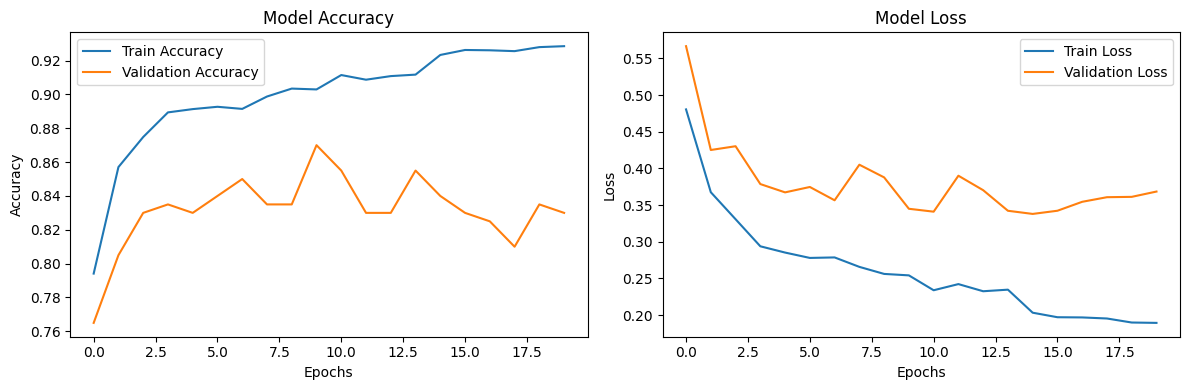

In [14]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Model Evaluation

In [15]:
acc_vr, loss_vr = model.evaluate(test_generator)
print(acc_vr)
print(loss_vr)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8636 - loss: 0.2986
0.3379753828048706
0.8399999737739563


In [16]:
acc_test, loss_test = model.evaluate(train_generator)
print(acc_test)
print(loss_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9249 - loss: 0.2034
0.19822236895561218
0.9260625243186951


#### Saving the model

In [17]:
model.save('nn_model.h5')

### CNN Model

#### Model Architecture

In [18]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 32:
        lr *= 0.5
    elif epoch > 28:
        lr *= 0.7
    elif epoch > 20:
        lr *= 0.9
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)


In [19]:
# Model creation
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Model Compilation

In [20]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


#### Model Summary

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,004,161 (19.09 MB)

 Trainable params: 5,001,281 (19.08 MB)

 Non-trainable params: 2,880 (11.25 KB)

#### Model Training

In [22]:
history = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[lr_scheduler])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.8781 - loss: 0.3567 - val_accuracy: 0.5400 - val_loss: 2.1712 - learning_rate: 0.0010
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.9523 - loss: 0.1277 - val_accuracy: 0.7750 - val_loss: 1.1817 - learning_rate: 0.0010
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9664 - loss: 0.0910 - val_accuracy: 0.8350 - val_loss: 0.4879 - learning_rate: 0.0010
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9726 - loss: 0.0758 - val_accuracy: 0.8500 - val_loss: 0.4110 - learning_rate: 0.0010
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9775 - loss: 0.0614 - val_accuracy: 0.7450 - val_loss: 0.7535 - learning_rate: 0.0010
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9793 - loss: 0.0587 - val_accuracy: 0.8350 - val_loss: 0.3445 - learning_rate: 0.0010
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9

#### Plotting the training and validation loss and accuracy

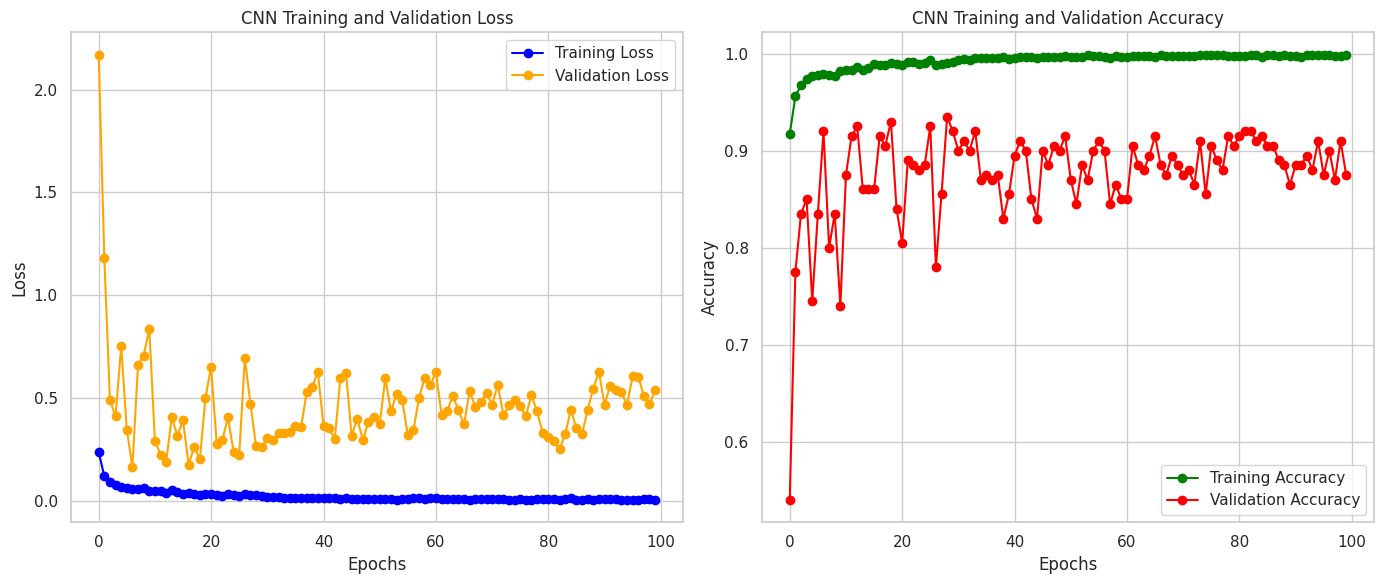

In [23]:
# Set a seaborn style
sns.set(style="whitegrid")

# Access the training history
cnn_history_dict = history.history

# Plotting the training and validation loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_dict['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(cnn_history_dict['val_loss'], label='Validation Loss', color='orange', marker='o')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history_dict['accuracy'], label='Training Accuracy', color='green', marker='o')
plt.plot(cnn_history_dict['val_accuracy'], label='Validation Accuracy', color='red', marker='o')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

#### Model Evaluation

In [24]:
acc_vr, loss_vr = model.evaluate(test_generator)
print(acc_vr)
print(loss_vr)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8938 - loss: 0.4524
0.5384705662727356
0.875


In [25]:
acc_test, loss_test = model.evaluate(train_generator)
print(acc_test)
print(loss_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9992 - loss: 0.0038
0.0018148842500522733
0.9995625019073486


#### Saving the model

In [26]:
model.save('cnn_open_closed_eye.keras')

### InceptionV3 Model

#### Creating Data Generators

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [28]:
train_data = train_datagen.flow_from_directory('/kaggle/input/mrl-eye-dataset',
                                               target_size=(80,80),
                                               batch_size=8,
                                               class_mode='categorical',
                                               subset='training' )

Found 16000 images belonging to 2 classes.


In [29]:
validation_data= train_datagen.flow_from_directory('/kaggle/input/mrl-eye-dataset',
                                                   target_size=(80,80),
                                                   batch_size=8,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 4000 images belonging to 2 classes.


In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'/kaggle/input/mrl-test',
                                             target_size=(80,80),
                                             batch_size=8,
                                             class_mode='categorical')

Found 1000 images belonging to 2 classes.


#### Model architecture

In [31]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#### Model Summary

In [32]:
model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 80, 80, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 39, 39,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 39, 39,    │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 39, 39,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 37, 37,    │      9,216 │ activation_7[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 37, 37,    │     18,432 │ activation_8[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │        192 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 18, 18,    │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 18, 18,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 18, 18,    │        240 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 18, 18,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │    138,240 │ activation_10[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        576 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 16, 16,    │          0 │ batch_normalizat

 Total params: 21,934,050 (83.67 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

#### Model Compilation

In [33]:
checkpoint = ModelCheckpoint('/kaggle/working/model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=10, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=5, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

#### Model training

In [35]:
history = model.fit(train_data,
        validation_data=validation_data,
        callbacks=callbacks,
        epochs=5)

Epoch 1/5
1999/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9086 - loss: 0.2280
Epoch 1: val_loss improved from inf to 0.27870, saving model to /kaggle/working/model.keras
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 0.9087 - loss: 0.2280 - val_accuracy: 0.9090 - val_loss: 0.2787 - learning_rate: 0.0010
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9517 - loss: 0.1263
Epoch 2: val_loss did not improve from 0.27870
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9517 - loss: 0.1263 - val_accuracy: 0.9062 - val_loss: 0.3414 - learning_rate: 0.0010
Epoch 3/5
1995/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9611 - loss: 0.1052
Epoch 3: val_loss did not improve from 0.27870
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9611 - loss: 0.1052 - val_accuracy: 0.9197 - val_loss: 0.3075 - learning_rate: 0.0010
Epoch 4/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9606 - loss: 0.0987
Epoch 4: val_loss did not i

#### Plotting the training and validation loss and accuracy

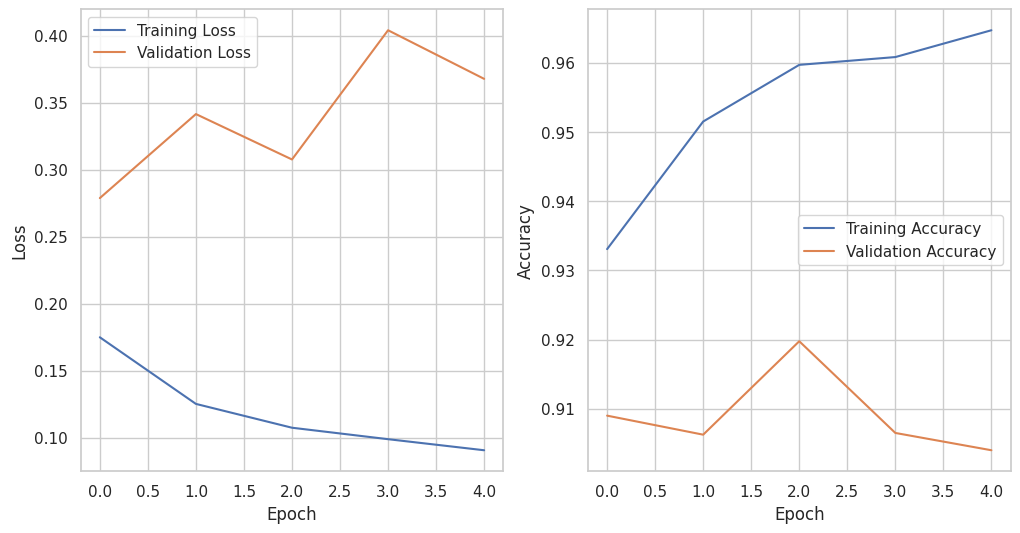

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Model Evaluation

In [37]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9080 - loss: 0.2687
0.2786986827850342
0.9089999794960022


In [38]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_test)
print(loss_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9617 - loss: 0.1046
0.1310252547264099
0.9509999752044678


#### Saving the model

In [39]:
model.save('inceptionV3_open_closed_eye.keras')